In [48]:
# imports and defaults
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os
import path_weighting as pw
import cn_derivations as cn
import data_parser as dp
import math
import mpmath
from timeit import default_timer as timer
import r_function_port as rfp

mpmath.dps = 30
mpmath.pretty = True

pd.options.display.max_rows = 2000
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')
os.getcwd()

'/home/nick/PycharmProjects/Feldkurs/ss19-feldkurs/Pycode'

In [42]:
k = 0.4  # von Karman constant
cp = 1004  # J kg^-1 K^-1, heat capacity of air
r_d = 287.05  # J kg^-1 K^-1, specific gas constant for dry air
beta_1 = 0.86
g = 9.81
station = "schiessstand"

"""Data overview"""
filename = "2019-05-24"
scint_data_new = dp.scintillometer_parse(filename)
"""Data overview"""
filename = "2018-05-06"
scint_data_old = dp.scintillometer_parse(filename)
scint_data_new

,Cn2,CT2,H_convection,crosswind,sigCrosswind,pressure,temp,humidity,pathLength,pathHeight,...,<XA>(c),<YA>(c),nSigXA(c),nSigYA(c),corXAYA(c),numDgnValid,numDgnValidCrosswind,numDgnTotal,channelFlagsCombined,error
Time,,,,,,,,,,,,,,,,,,,,,
2019-05-24 05:26:00+02:00,1.911500e-16,0.000193,4.6,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20451.6,20609.4,0.010469,0.011068,-0.004,1,0,1,0,1
2019-05-24 05:27:00+02:00,2.447200e-16,0.000248,5.5,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20465.4,20579.2,0.013037,0.013001,0.120,2,0,2,0,1
2019-05-24 05:28:00+02:00,2.616500e-16,0.000265,5.8,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20346.9,20589.7,0.012148,0.013691,0.048,2,0,2,0,1
2019-05-24 05:29:00+02:00,2.964500e-16,0.000300,6.4,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20477.3,20494.0,0.013917,0.013173,0.016,2,0,2,0,1
2019-05-24 05:30:00+02:00,2.020200e-16,0.000204,4.8,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20428.3,20515.5,0.012816,0.010916,0.131,2,0,2,0,1
2019-05-24 05:31:00+02:00,1.570300e-16,0.000159,3.9,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20497.3,20572.7,0.009635,0.010344,0.042,2,0,2,0,1
2019-05-24 05:32:00+02:00,1.190100e-16,0.000120,3.2,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20535.7,20597.4,0.009267,0.010188,0.235,2,0,2,0,1
2019-05-24 05:33:00+02:00,1.351200e-16,0.000137,3.5,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20523.7,20572.1,0.009351,0.009788,0.101,2,0,2,0,1
2019-05-24 05:34:00+02:00,1.389400e-16,0.000141,3.6,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20479.6,20545.7,0.009716,0.009794,0.110,2,0,2,0,1


In [44]:
filename = "2019-05-23"
station = "hungerburg"
z_eff = pw.return_z_effective(station)
cdf_new = cn.derive_ct2(filename)
# Calculate kinematic surface heat flux
cdf["Q_0"] = 1.165 * k * z_eff * (cdf["CT2"] ** (3 / 4)) * (
    g / cdf["temperature"]) ** (1 / 2)

# Air density
cdf["rho_air"] = 100 * cdf["pressure"] / (
    r_d * cdf["temperature"])
# Surface sensible heat flux under free convection
cdf["H_free"] = cdf["Q_0"] * cp * cdf["rho_air"]
cdf["theta_star"] = 0
cdf["u_star"] = 0

Please enter the stability conditions (stable, unstable, or other):
u
Mean path height: 84.24445786885246m
Effective path height: 47.645469666029996m


NameError: name 'cdf' is not defined

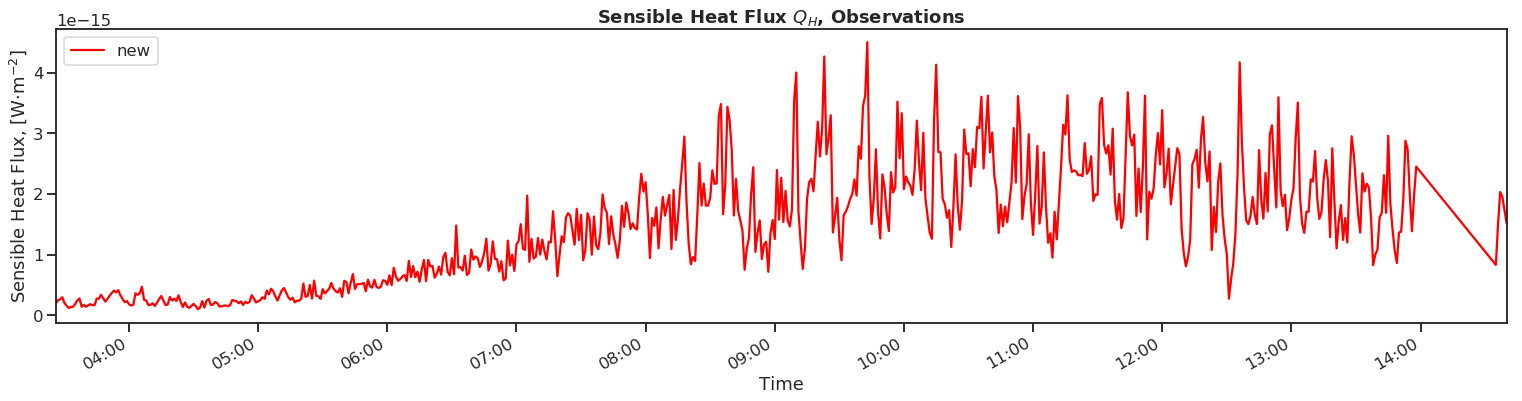

In [46]:
plt.figure(figsize=(26, 6))
# scint_data_old["Cn2"].plot(color="black", label="old")
(scint_data_new["Cn2"].loc[scint_data_new["Cn2"]<800]).plot(color="red", label="new")

plt.legend(loc="upper left")
plt.title(r"Sensible Heat Flux $Q_{H}$, Observations", fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Sensible Heat Flux, [W$\cdot$m$^{-2}$]")
ax = plt.gca()
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))  # hours and minutes
plt.show()

In [49]:
filename="2019-05-23"
dp.weather_download(filename)

,t,rf,wr,wg,regen,ldred,ldstat,sonne
datetime,,,,,,,,
2019-05-24 00:15:00+00:00,11.0,80.0,201.0,2.2,0.0,1018.2,949.8,0.0
2019-05-24 00:16:00+00:00,11.0,80.0,201.0,2.2,0.0,1018.2,949.8,0.0
2019-05-24 00:17:00+00:00,11.0,80.0,201.0,2.2,0.0,1018.2,949.8,0.0
2019-05-24 00:18:00+00:00,11.0,80.0,201.0,2.2,0.0,1018.2,949.8,0.0
2019-05-24 00:19:00+00:00,11.0,80.0,201.0,2.2,0.0,1018.2,949.8,0.0
2019-05-24 00:20:00+00:00,11.0,80.0,201.0,2.2,0.0,1018.2,949.8,0.0
2019-05-24 00:21:00+00:00,11.0,80.0,201.0,2.2,0.0,1018.2,949.8,0.0
2019-05-24 00:22:00+00:00,11.0,80.0,201.0,2.2,0.0,1018.2,949.8,0.0
2019-05-24 00:23:00+00:00,11.0,80.0,201.0,2.2,0.0,1018.2,949.8,0.0
